In [ ]:
import os
import json
import nltk
from nltk.corpus import stopwords
from typing import TypedDict


class CutData(TypedDict):
    '''type of the cuts json data file'''
    label: str
    start: float
    end: float
    video: str

def clean_word(word: str, chars: list[str], rep: str = '') -> str:
    for c in chars:
        word = word.replace(c,rep)
    return word

inv_chars = ['\n', ',', '.', '"', '-', '?', '!', '¿', '¡']

# cuts data contains list of data for each cut json file
cuts_data: list[CutData] = []
# words contain list of words for each cut, excepting stopwords
words: dict[str, list[str]] = {}
# times contain lenght (s) for each cut
times: dict[str, float] = {}
# videos contains videos names
videos: set[str] = set()

# If not downloaded, run
# nltk.download('stopwords')
stop_words = stopwords.words('spanish')

dir = './data/'
for dirpath, dirnames, filenames in os.walk(dir):
    for f in filter(lambda fname: fname.endswith('.json'), filenames):
        with open(dirpath + '/' + f) as datafile:
            data: CutData = json.load(datafile)
            cuts_data.append(data)
            words[data['video'].split('-')[-1] + '/' + f] = [w for w in clean_word(data['label'], inv_chars, '').lower().split(' ') if (w and w not in stop_words)]
            times[data['video'].split('-')[-1] + '/' + f] = (data['end'] - data['start'])
            videos.add(data['video'])

print('''La base de datos contiene:
    {} videos completos
    {} clips resultantes de dividir los videos de acuerdo a los subtítulos
    {} segundos de video'''.format(len(videos), len(cuts_data), sum(times.values())))

Estadísticas de la duración de los clips:

count    430.000000
mean       5.931605
std        3.344872
min        1.400000
25%        3.585000
50%        5.260000
75%        7.180000
max       25.580000
dtype: float64

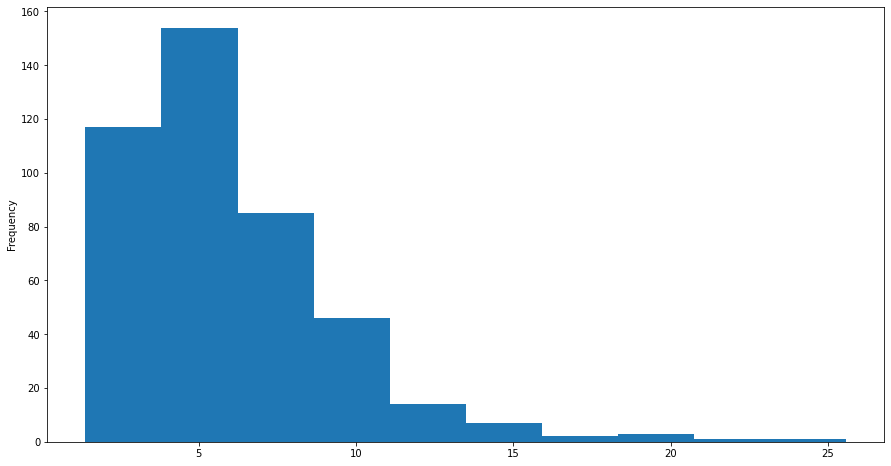

In [27]:
import pandas as pd
from IPython.display import display

times_s = pd.Series(times)
display(times_s.describe())
out = times_s.plot.hist(figsize=(15,8))

Estadísticas de cantidad de palabras por clip:

count    430.000000
mean       4.841860
std        1.916221
min        0.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       10.000000
dtype: float64

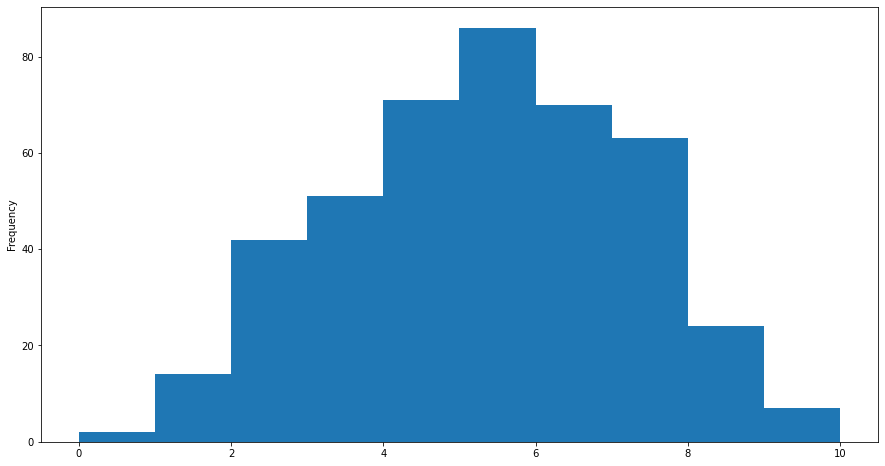

In [26]:
words_s = pd.Series({k: len(v) for k, v in words.items()})
display(words_s.describe())
out = words_s.plot.hist(figsize=(15,8))

Estadísticas acerca de frecuencia de palabras entre todos los clips:

Palabras más comunes: [('sordos', 15), ('cada', 14), ('deporte', 13), ('persona', 12), ('cn', 11), ('así', 11), ('agua', 10), ('argentina', 10), ('hoy', 10), ('carne', 10)]


count    1293.000000
mean        1.610209
std         1.449230
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        15.000000
dtype: float64

<AxesSubplot:>

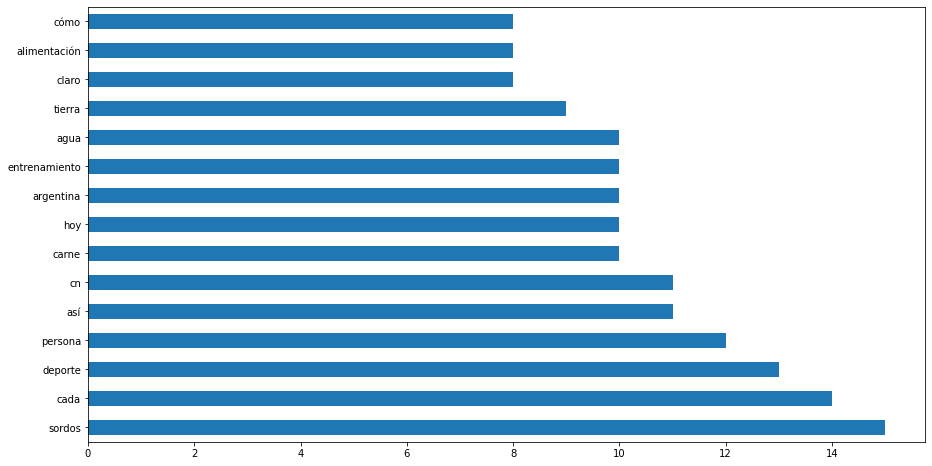

In [20]:
from collections import Counter

total_words = [item for sublist in words.values() for item in sublist]
word_count = Counter(total_words)

total_words_s = pd.Series(word_count).sort_values(ascending=False)
display(total_words_s.describe())
display(total_words_s.iloc[:15].plot.barh(figsize=(15,8)))

Bigramas más comunes: [(('cn', 'sordos'), 11), (('liquido', 'negro'), 4), (('buena', 'alimentación'), 4), (('hacer', 'compost'), 3), (('exportaciones', 'carne'), 3), (('va', 'depender'), 3), (('seis', 'meses'), 3), (('cada', 'persona'), 3), (('personas', 'sordas'), 3), (('lengua', 'señas'), 3)]


count    2003.000000
mean        1.039441
std         0.309590
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
dtype: float64

<AxesSubplot:>

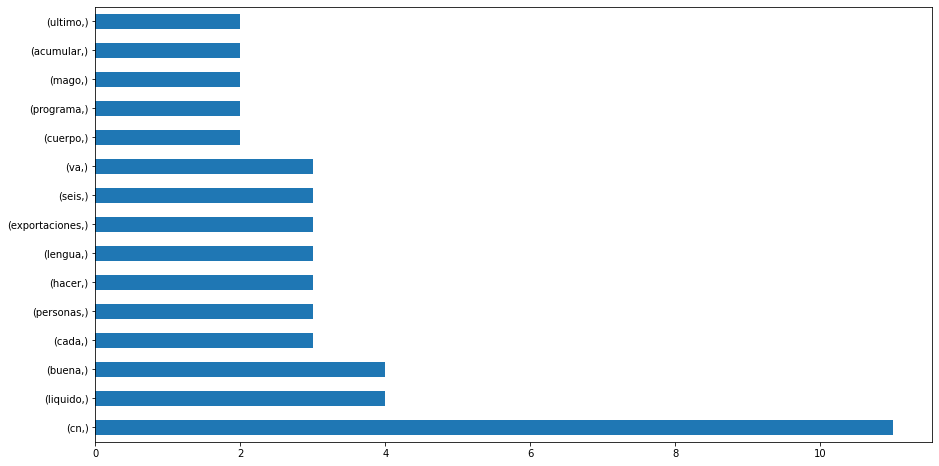

In [24]:
total_bigrams = [tuple(total_words[i:i + 2]) for i in range(len(total_words))]
bigram_count = Counter(total_bigrams)
print('Bigramas más comunes:', bigram_count.most_common(10))

total_bigrams_s = pd.Series(bigram_count).sort_values(ascending=False)
display(total_bigrams_s.describe())
display(total_bigrams_s.iloc[:15].plot.barh(figsize=(15,8)))

Trigramas más comunes: [(('pueden', 'preguntar', 'averiguar'), 2), (('acumular', 'liquido', 'negro'), 2), (('obelisco', 'ícono', 'porteño'), 2), (('va', 'depender', 'mirada'), 2), (('depender', 'mirada', 'cada'), 2), (('hoy', 'cn', 'sordos'), 2), (('cn', 'sordos', 'vamos'), 2), (('75000', 'muertos', 'coronavirus'), 2), (('perdiendo', 'calidad', 'agua'), 1), (('calidad', 'agua', 'tierra'), 1)]


count    2074.000000
mean        1.003857
std         0.062002
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
dtype: float64

<AxesSubplot:>

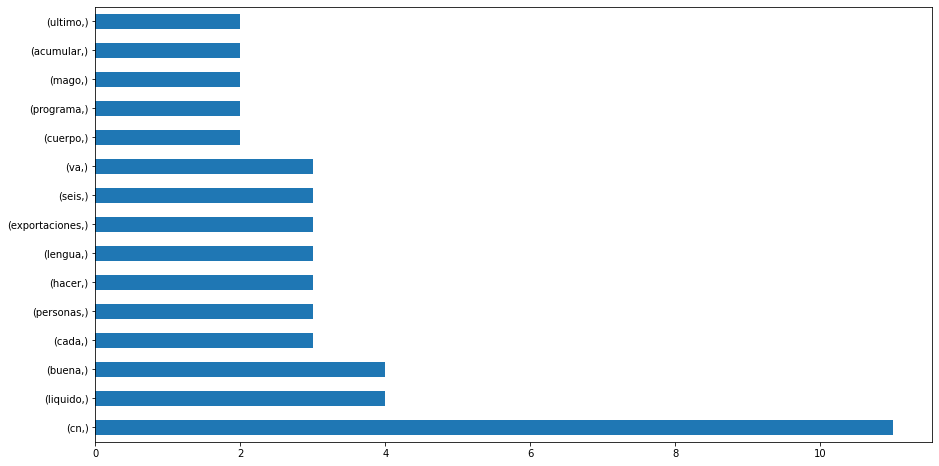

In [25]:
total_trigrams = [tuple(total_words[i:i + 3]) for i in range(len(total_words))]
trigram_count = Counter(total_trigrams)
print('Trigramas más comunes:', trigram_count.most_common(10))

total_trigrams_s = pd.Series(trigram_count).sort_values(ascending=False)
display(total_trigrams_s.describe())
display(total_bigrams_s.iloc[:15].plot.barh(figsize=(15,8)))